<a href="https://colab.research.google.com/github/GuCuChiara/prediccion_numeros_MNIST/blob/main/prediccion_numeros_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification with Keras and tensorflow

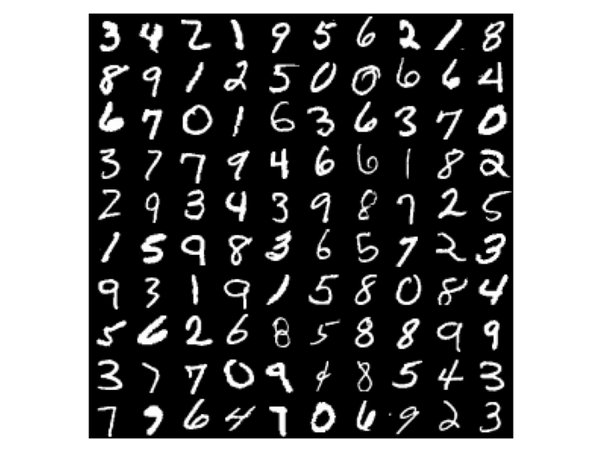

* The **MNIST database (Modified National Institute of Standards and Technology database)** is a large database of handwritten digits that is widely used for training and testing in the field of machine learning.

* The black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

* The **MNIST** database contains 60,000 training images and 10,000 testing images.

#Import of libraries

In [96]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging  #Logging is used to tracking events that occur when the software runs
logger = tf.get_logger() #get_logger() is used to get the logger instance

logger.setLevel(logging.ERROR)
print(logger.setLevel)

<bound method Logger.setLevel of <Logger tensorflow (ERROR)>>


In [97]:
tf_version = f'Versión de tensorflow: {tf.__version__}'
#keras_version = f'Versión de keras: {keras.__version__}' 
print(tf_version)
#print(keras_version)

Versión de tensorflow: 2.11.0


#MNIST database download

In [98]:
# Para descargar la base de datos MNIST
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [99]:
print(train_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [100]:
print(test_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


###Etiquetas de texto (class_names) para cada posible respuesta de la red neuronal:

In [101]:
class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve'
]

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [102]:
print(f' Ejemplos de entrenamiento: {num_train_examples}')

 Ejemplos de entrenamiento: 60000


In [103]:
print(f' Ejemplos de validación: {num_test_examples}')

 Ejemplos de validación: 10000


###Definimos el rango de normalización de los pixeles, de 0 a 255, lo cambiamos entre 0 a 1: 

In [104]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

#llamamos a la función de normalización:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

##Definimos la estructura de nuestra red neuronal:

In [105]:
#Estructura de la red
model = tf.keras.Sequential([
  # capa inicial de 784 neuronas, con las imágenes de 28x28
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
  # agregamos 2 capas ocultas densascon 64 neuronas cada una, función de activación ReLu:
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
  # capa de salida de 10 neuronas, con la función de activación softmax para clasificación
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])

## Compilamos el modelo, utilizando:
* la función de costo **sparse_categorical_crossentropy**
* optimizador: **adam**



In [106]:
#Indicar las funciones a utilizar
model.compile(
	optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

### Observamos nuestro modelo de red:

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### Definimos el tamaño de lote de entrenamiento (BATCHSIZE) y ordenamos los datos de entrenamiento de manera aleatoria:

In [108]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

### Especificamos los datos del entrenamiento:

In [109]:
#Realizar el aprendizaje
history= model.fit(
	train_dataset, epochs=10,
  validation_data=(test_dataset),
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE),# 60000 / 32 = 1875 steps x epoch
  verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 0.2771 - accuracy: 0.9190 - val_loss: 0.1569 - val_accuracy: 0.9524
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1242 - accuracy: 0.9619 - val_loss: 0.1178 - val_accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0844 - accuracy: 0.9735 - val_loss: 0.1145 - val_accuracy: 0.9662
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0927 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0984 - val_accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0884 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.0880 - val_ac

##Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas

In [110]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado en las pruebas: ", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.1065 - accuracy: 0.9741
Resultado en las pruebas:  0.9740999937057495


###Vemos el vector de predicción de una imagen del dataset de test:

In [111]:
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)
  
print(predictions[1])

1/1 [==============================] - 0s 104ms/step
[9.99999940e-01 9.42684511e-21 1.23652792e-14 3.74599093e-15
 2.65955472e-19 1.89381583e-11 1.27942032e-10 1.05588162e-12
 2.24245382e-16 1.04207684e-19]


##Vemos ejemplos de predicción del set de evaluación:

In [112]:
def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

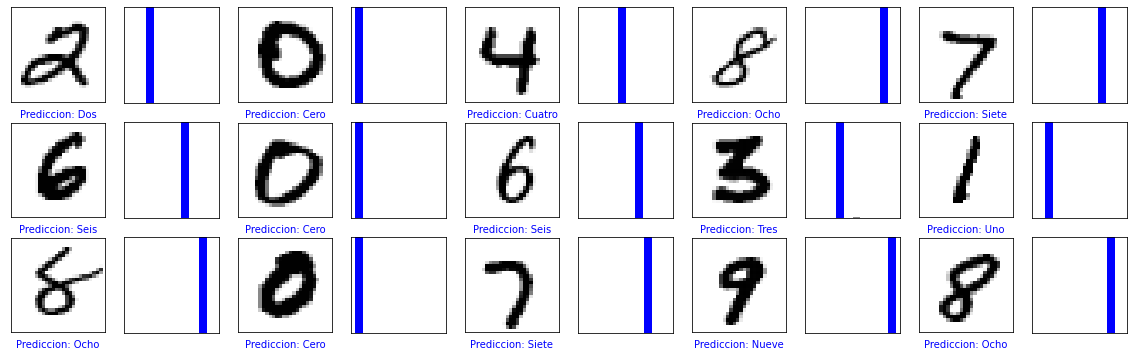

In [113]:
def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=3
numcols=5
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)
plt.show()

###Plot Accuracy and Loss

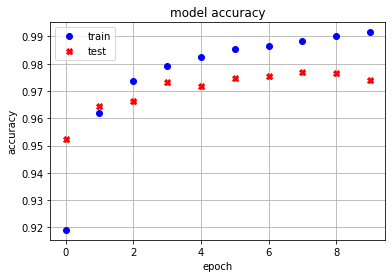

In [114]:
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

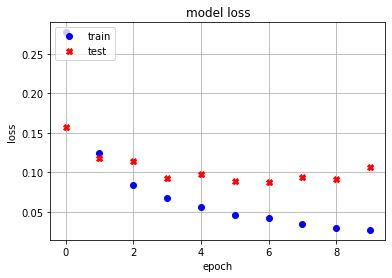

In [115]:
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'rX')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()